*importing the data from kaggle*

In [1]:
import kagglehub
kmader_skin_cancer_mnist_ham10000_path = kagglehub.dataset_download('kmader/skin-cancer-mnist-ham10000')

100%|██████████| 5.20G/5.20G [01:03<00:00, 87.3MB/s]

Extracting files...


*using Json API key*

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadatareqjalal","key":"2c26c6a58c6352d1dec78112aac3db08"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

*download the datset as a zip file*

In [4]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.18G/5.20G [00:52<00:00, 132MB/s]
100% 5.20G/5.20G [00:52<00:00, 107MB/s]


*unzip the dataset*

In [5]:
!unzip skin-cancer-mnist-ham10000.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: /content/data/ham10000_images_part_2/IS

*importing libraries*

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential                                   # Dense to interact all layers together , Dropout to drop random cells to reduce overfitting in training
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout# Convolutional Layer to detect patterns, MaxPooling to reduce output dimensions to simplify mathematical operations, Flatten to convert from matrix to vector                                                                                

*content of the dataset*

In [7]:
!ls /content/data

ham10000_images_part_1	HAM10000_images_part_2	hmnist_28_28_RGB.csv
HAM10000_images_part_1	HAM10000_metadata.csv	hmnist_8_8_L.csv
ham10000_images_part_2	hmnist_28_28_L.csv	hmnist_8_8_RGB.csv


*insepcting the csv file data*

In [8]:
metadata_path="/content/data/HAM10000_metadata.csv"
data = pd.read_csv(metadata_path)
print(data.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [9]:
data.info() #names of the columns and thier data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [10]:
data.describe() #statistical information about the csv file

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [11]:
data.shape  

(10015, 7)

*plotting the distribution of each class*

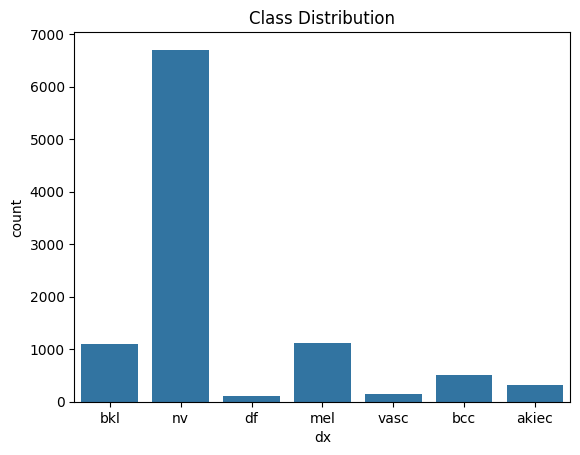

In [12]:
sns.countplot(data=data, x='dx') #represent count of occurrences for each class
plt.title("Class Distribution") 
plt.show()

*merging two pathes together*

In [13]:
import os
import cv2

data_path_1 = "/content/data/ham10000_images_part_1"
data_path_2 = "/content/data/ham10000_images_part_2"

all_images_paths = []     #the path that will contain both parts of the data
for data_path in [data_path_1, data_path_2]:
    for img_id in os.listdir(data_path):
        img_path = os.path.join(data_path, img_id)  #joining the image id with the image itself
        all_images_paths.append(img_path)

for img_path in all_images_paths:
    img = cv2.imread(img_path)

*Visualizing images from the dataset*

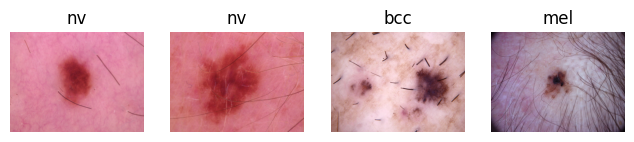

In [29]:
sample_images = data.sample(4)  #random sample from the dataset

plt.figure(figsize=(10, 7))
for j, (i, row) in enumerate(sample_images.iterrows()):
    img_id = row['image_id']
    img_path = os.path.join(data_path,img_id) #joining the id of the image with the image itself
    if not img_id.endswith('.jpg'):     #making sure that the extension of the image is jpg
        img_path += ".jpg"
    img = cv2.imread(img_path)
    if img is not None:
        plt.subplot(1, 4, j + 1)
        # from BGR to RGB
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #converting to RGB
        # title for each image
        plt.title(row['dx'])
        # hide axis
        plt.axis('off')
plt.show()

*Splitting data into training and testing sets*

In [16]:
from sklearn.model_selection import train_test_split # Import train_test_split from sklearn.model_selection
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['dx'], random_state=42) #stratify ensure equal representation for each class

# Data preprocessing: Normalize and resize
image_size = (128, 128)  # Resize all images to 128x128

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, image_size)
        img = img / 255.0            # Normalize pixel values converting range 0-->1 more acuracy,high speed computation
    else:
        print(f"Image not found: {img_path}")
    return img

# preparing training image array
train_images = np.array([
    preprocess_image(img_path)
    for img_path in all_images_paths
    if os.path.splitext(os.path.basename(img_path))[0] in train_data['image_id'].values
])

# Apply preprocessing for testing images
test_images = np.array([
    preprocess_image(img_path)
    for img_path in all_images_paths
    if os.path.splitext(os.path.basename(img_path))[0] in test_data['image_id'].values
])


# lablels after encoding (one hot encoding)
train_labels = pd.get_dummies(train_data['dx']).values
test_labels = pd.get_dummies(test_data['dx']).values

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")
if img is None:
    print(f"Image not found: {img_path}")


Train images shape: (8012, 128, 128, 3)
Test images shape: (2003, 128, 128, 3)
Train labels shape: (8012, 7)
Test labels shape: (2003, 7)


*Augmenting the training data*

In [17]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,    #transilation
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,       #scalling up - out
    horizontal_flip=True  #mirror
)
# ImageDataGenerator to make rotations, sizings to give the model different options for training# ImageDataGenerator to make rotations, sizings to give the model different options for training
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)#handel images in batches

*Define the CNN model*

In [21]:
#model Initialization
from tensorflow.keras.optimizers import Adamax # Import Adamax optimizer

model = keras.models.Sequential()#Sequential model where layers are stacked linearly
model.add(keras.layers.Input(shape=[128, 128, 3])) # input layer 



model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')) #32 filters with size 3x3 to extract features
model.add(keras.layers.MaxPooling2D())         #pooling reduce dimesionality                                   #Ensures output size matches input size by padding zeros
model.add(keras.layers.BatchNormalization())   #normalizing scalling                                           #He Normal initialization, optimized for ReLU activation


model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')) #64 filters
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')) #128 filters
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())

#classification phase
model.add(keras.layers.Dropout(rate=0.2))  #disable neurons to reduce overfitting
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal')) #Fully Connected Layers 
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())
#output layer                                                                                                        #Glorot Uniform is an initialization method used to set the initial values of the weights in the neural network
model.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier')) #7 classes ,softmax activation computes the probability of each class

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifier (Dense)                   │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,677,127 (33.10 MB)

 Trainable params: 8,676,103 (33.10 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.3059 - loss: 1.9647 - val_accuracy: 0.6538 - val_loss: 1.4737
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6713 - loss: 1.3431 - val_accuracy: 0.6781 - val_loss: 1.2533
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6595 - loss: 1.1743 - val_accuracy: 0.6781 - val_loss: 1.1529
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.6769 - loss: 1.0754 - val_accuracy: 0.6781 - val_loss: 1.1576
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.6717 - loss: 1.0254 - val_accuracy: 0.6775 - val_loss: 1.1659
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7027 - loss: 0.9205 - val_accuracy: 0.6712 - val_loss: 1.2234
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7576 - loss: 0.7360 - val_accuracy: 0.6575 - val_loss: 1.3988
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8069 - loss: 0.5924 - val_a

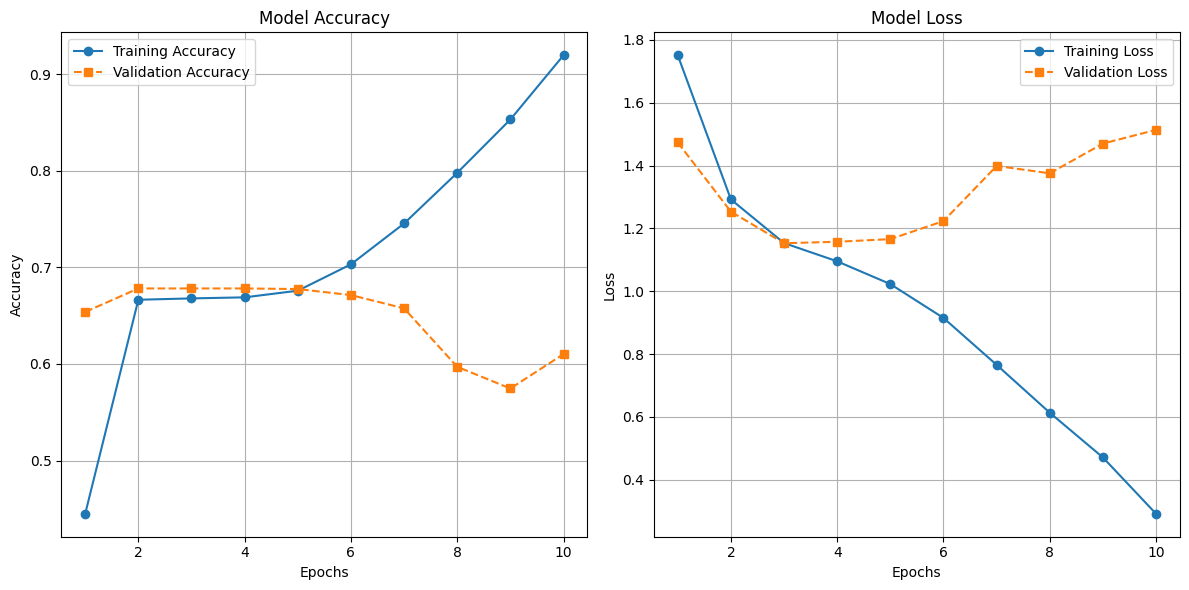

In [22]:
import matplotlib.pyplot as plt

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='s', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


*KNN algorithm implemetation*

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Flatten images for KNN (convert 2D images to 1D vectors)
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

print(f"Flattened Train images shape: {train_images_flattened.shape}")  #insepcting the size 
print(f"Flattened Test images shape: {test_images_flattened.shape}")

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  

# Train the KNN model
knn.fit(train_images_flattened, train_labels)

# Predict on the test set
test_predictions = knn.predict(test_images_flattened)

# Decode predictions and true labels from one-hot encoding to class names
predicted_classes = np.argmax(test_predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Evaluate the model
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))


Flattened Train images shape: (8012, 49152)
Flattened Test images shape: (2003, 49152)
KNN Model Accuracy: 53.27%
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.18      0.05        65
           1       0.00      0.00      0.00       103
           2       0.13      0.01      0.02       220
           3       0.00      0.00      0.00        23
           4       0.11      0.01      0.02       223
           5       0.67      0.78      0.72      1341
           6       0.00      0.00      0.00        28

    accuracy                           0.53      2003
   macro avg       0.13      0.14      0.12      2003
weighted avg       0.48      0.53      0.49      2003



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


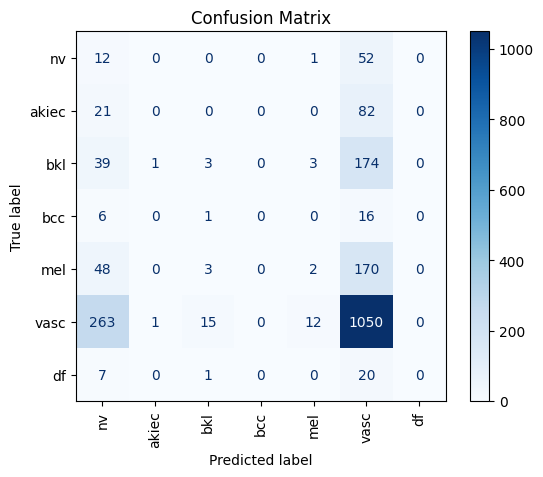

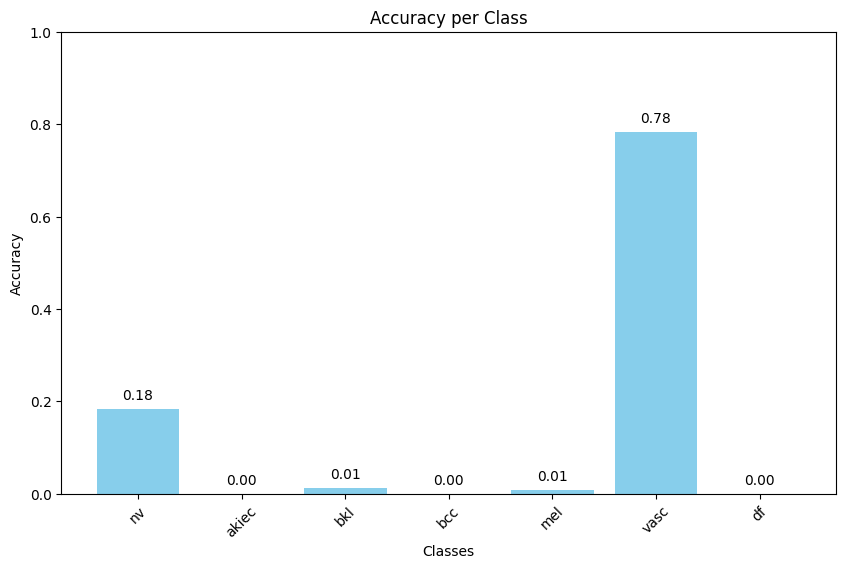

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data['dx'].unique())
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# Bar Plot for Accuracy per Class
class_accuracy = cm.diagonal() / cm.sum(axis=1)
classes = train_data['dx'].unique()

plt.figure(figsize=(10, 6))
plt.bar(classes, class_accuracy, color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Accuracy per Class")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
for i, v in enumerate(class_accuracy):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()
